# Korelacje danych dla spółek sektoru energetycznego

## Correlations of energy companies data

In [1]:
#import bibliotek
#import libriaries
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import datetime
import plotly.express as px
import sqlite3
import os
import sqlite3

# Folder docelowy
# Destination folder (comment unused directory)
#1 
#os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")
#2
os.chdir("F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

# Stworzenie połączenia za pomocą sqlite3
# Create your connection.
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

# Korelacje dla Arch Coal

## Arch Coal stock prices correlations

In [8]:
indicator="Arch_Coal"
# Wybranie z bazy danych histotycznych wartosci akcji danej firmy oraz wskaźników
# Get SQLLite select statement Arch Coal stock prices and indicators
df = pd.read_sql_query("""SELECT x."Date", 
g."Index" as Gold, 
c19."Index" Covid19, 
co."Index" as Crude_Oil, 
cr."Index" as Copper, 
s."Index" as Silver, 
p."Index" as Platinum, 
ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, 
pa."Index" as Palladium, x."Index" as """+indicator+"""
 FROM """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON x.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON x.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
WHERE x."Index" and g."Index" and co."Index" and cr."Index" and s."Index" and ng."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Arch_Coal
846,2020-03-25 00:00:00,1605.45,416881.0,24.49,2.2040,13.965,745.50,1.80,103.664,2247.6,33.24
847,2020-03-26 00:00:00,1634.80,468092.0,22.60,2.1780,14.415,737.10,1.73,103.664,2226.1,30.91
848,2020-03-27 00:00:00,1617.30,527839.0,21.51,2.1720,14.315,740.82,1.70,103.664,2196.8,27.32
849,2020-03-30 00:00:00,1618.30,715377.0,20.09,2.1555,14.055,723.84,1.65,103.664,2197.6,27.38
850,2020-03-31 00:00:00,1608.95,777187.0,20.48,2.2280,13.930,728.80,1.71,103.664,2304.8,28.90


,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Arch_Coal
Gold,1.000000,0.165391,-0.208924,-0.148948,0.340396,0.037760,-0.677749,0.317853,0.876266,-0.420789
Covid19,0.165391,1.000000,-0.821807,-0.793628,-0.726239,-0.722762,-0.689060,-0.656775,-0.179127,-0.759269
Crude_Oil,-0.208924,-0.821807,1.000000,0.519673,-0.202604,-0.060670,0.158055,0.536684,-0.083667,0.698079
Copper,-0.148948,-0.793628,0.519673,1.000000,-0.012528,0.219692,0.208571,0.191164,-0.131840,0.515552
Silver,0.340396,-0.726239,-0.202604,-0.012528,1.000000,0.824148,-0.227264,-0.412764,0.033209,-0.358831
Platinum,0.037760,-0.722762,-0.060670,0.219692,0.824148,1.000000,0.005606,-0.515569,-0.194151,-0.123079
Natural_Gas,-0.677749,-0.689060,0.158055,0.208571,-0.227264,0.005606,1.000000,-0.090000,-0.567661,0.377196
Industrial_Production,0.317853,-0.656775,0.536684,0.191164,-0.412764,-0.515569,-0.090000,1.000000,0.556141,0.452336
Palladium,0.876266,-0.179127,-0.083667,-0.131840,0.033209,-0.194151,-0.567661,0.556141,1.000000,-0.273479
Arch_Coal,-0.420789,-0.759269,0.698079,0.515552,-0.358831,-0.123079,0.377196,0.452336,-0.273479,1.000000


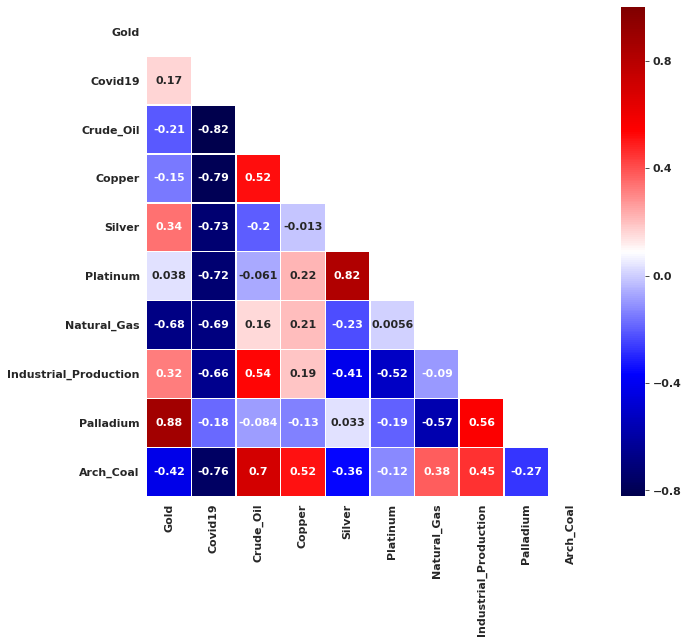

In [9]:
# Zobrazowanie korelacji wskaznikow oraz akcji firmy na wykresie typu "heatmap"
# Make correlation table with heatmap

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Zmiana właściwości czcionki
# Change font size

font = {'family' : 'Verdana',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)

# Przypisanie ramki danych do zmiennej
# Saving df to variable
corr = df.corr()

# Użycie "mask" w celu wydrukowania wykresu bez lustrzanego odbicia danych
# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 9))
    ax = sns.heatmap(corr,
            mask=mask,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="seismic",
            linewidths=.5
           ,)

# Wyswietlenie tabeli
# Make correlation table
df.corr()

# Peabody Energy stock prices correlations

## Korelacje dla Peabody Energy

In [10]:
indicator="Peabody"
# Wybranie z bazy danych histotycznych wartosci akcji danej firmy oraz wskaźników
# Get SQLLite select statement Peabody stock prices and indicators
df = pd.read_sql_query("""SELECT x."Date", 
g."Index" as Gold, 
c19."Index" Covid19, 
co."Index" as Crude_Oil, 
cr."Index" as Copper, 
s."Index" as Silver, 
p."Index" as Platinum, 
ng."Index" as Natural_Gas,
ip."Index" as Industrial_Production, 
pa."Index" as Palladium, x."Index" as """+indicator+"""
 FROM """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Gold as g ON x.Date=g.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Natural_Gas as ng ON x.Date=ng.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
WHERE x."Index" and g."Index" and co."Index" and cr."Index" and s."Index" and ng."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

df.tail()

,Date,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Peabody
725,2020-03-25 00:00:00,1605.45,416881.0,24.49,2.2040,13.965,745.50,1.80,103.664,2247.6,3.12
726,2020-03-26 00:00:00,1634.80,468092.0,22.60,2.1780,14.415,737.10,1.73,103.664,2226.1,2.84
727,2020-03-27 00:00:00,1617.30,527839.0,21.51,2.1720,14.315,740.82,1.70,103.664,2196.8,2.81
728,2020-03-30 00:00:00,1618.30,715377.0,20.09,2.1555,14.055,723.84,1.65,103.664,2197.6,2.70
729,2020-03-31 00:00:00,1608.95,777187.0,20.48,2.2280,13.930,728.80,1.71,103.664,2304.8,2.90


,Gold,Covid19,Crude_Oil,Copper,Silver,Platinum,Natural_Gas,Industrial_Production,Palladium,Peabody
Gold,1.000000,0.165391,-0.340238,-0.347966,0.493625,0.182029,-0.686378,0.121977,0.869731,-0.805475
Covid19,0.165391,1.000000,-0.821807,-0.793628,-0.726239,-0.722762,-0.689060,-0.656775,-0.179127,-0.731062
Crude_Oil,-0.340238,-0.821807,1.000000,0.482920,-0.130491,0.035575,0.194584,0.496139,-0.236617,0.622074
Copper,-0.347966,-0.793628,0.482920,1.000000,0.150246,0.449921,0.308334,-0.142144,-0.417039,0.627743
Silver,0.493625,-0.726239,-0.130491,0.150246,1.000000,0.811534,-0.257622,-0.302587,0.196742,-0.337639
Platinum,0.182029,-0.722762,0.035575,0.449921,0.811534,1.000000,-0.024330,-0.405810,-0.049305,-0.069698
Natural_Gas,-0.686378,-0.689060,0.194584,0.308334,-0.257622,-0.024330,1.000000,-0.012742,-0.596390,0.573005
Industrial_Production,0.121977,-0.656775,0.496139,-0.142144,-0.302587,-0.405810,-0.012742,1.000000,0.397825,0.016283
Palladium,0.869731,-0.179127,-0.236617,-0.417039,0.196742,-0.049305,-0.596390,0.397825,1.000000,-0.776626
Peabody,-0.805475,-0.731062,0.622074,0.627743,-0.337639,-0.069698,0.573005,0.016283,-0.776626,1.000000


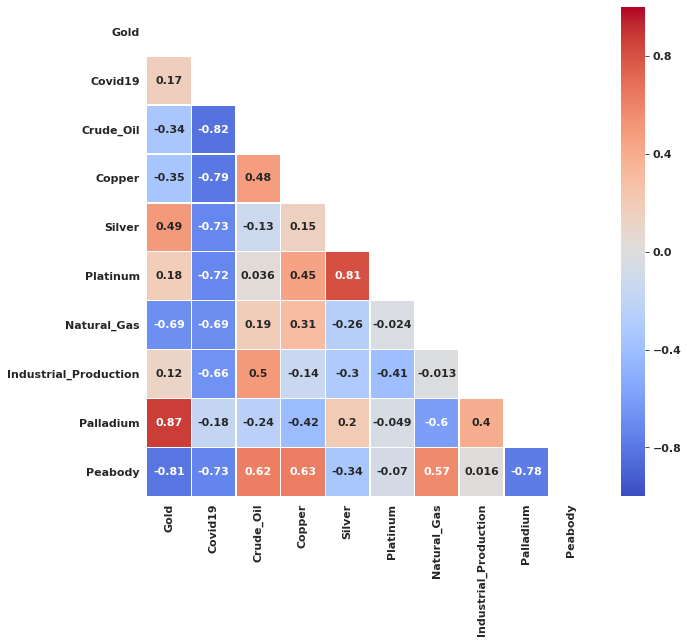

In [11]:
# Zobrazowanie korelacji wskaznikow oraz akcji firmy na wykresie typu "heatmap"
# Make correlation table with heatmap

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Zmiana właściwości czcionki
# Change font size

font = {'family' : 'Verdana',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)

# Przypisanie ramki danych do zmiennej
# Save df to variable
corr = df.corr()

# Użycie "mask" w celu wydrukowania wykresu bez lustrzanego odbicia danych
# Use a mask to plot only part of a matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 9))
    ax = sns.heatmap(corr,
            vmin=-1,
            vmax=1,
            mask=mask,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="coolwarm",
            linewidths=.5
           ,)

# Make correlation table
# Wyswietlenie tabeli
df.corr()